# Information to take care:

* The paper is about spectroscopy.  
* This is analog quantum simulation (CV)  
* This algorithm can be extendent for open quantum systems.  
* They use the base-kickback technique.
* MQB = Mixed qudit boson
* The example is using a single vibrational mode.

# Documentation:

[1] Operators: https://docs.pennylane.ai/en/stable/introduction/operations.html

# Comments from the paper:

* "Therefore, a(t) is the only quantity whose measurement is required to generate a vibronic spectrum."  
* "It can be measured on a quantum simulator by keeping a copy of the initial wavefunction in superposition with the time-evolved wavefunction, so that their overlap can be determined at the end of the simulation via an interference measurement."  
* "After transitioning to D0, the wavefunction is no longer stationary and the molecule begins to vibrate"

# IMPORTANT TO READ:

* The real or imaginary part of a(t) can be measure in figure 2 if we applied the Rx gate or not.  

# We need:

* Ainit
* H, H', H''
* u

# Equations:

$$ \hat{H}_{SO_2} = \hbar \omega_b + E_{S_0} |S_0\rangle \langle S_0 | + (E_{D_0}-\sqrt{2}\hbar \omega_b \alpha) |D_0\rangle \langle D_0 |  $$

Using approximations: (In this representation $\mu' = I$ )

$$ \hat{H}'_{SO_2} = (\hbar \omega_b \hat{n}-\sqrt{2}\hbar \omega_b \alpha \hat{Q}+ \Delta E) |0\rangle \langle 0| + \hbar \omega_b \hat{n} |1\rangle \langle 1| $$

Using simetries we can achieve:

$$ \hat{H}''_{SO_2} = \hbar \omega_b \hat{n} + \frac{\hbar \omega_b \alpha}{\sqrt{2}} \hat{\sigma}_x \hat{Q}$$

In [1]:
# Libraries
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [46]:
wb = 1 # 2*np.pi*12.44*10e+9
alpha = 1.716

dev = qml.device("default.qubit", wires=2)

Hamiltonian = qml.PauliX(0) @ qml.PauliX(1)

@qml.qnode(dev)
def Trotter(time, steps):

    #qml.Displacement(alpha_mag, alpha_phase, 1)

    for i in range(steps):
        qml.exp(Hamiltonian, -1j*time)

    return qml.expval(qml.PauliZ(0))

c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.avconv_path rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The animation.html_args rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
c:\Users\Kevin Joven\AppData\Local\Programs\Python\Python39\lib\_collections_abc.py:940: MatplotlibDeprecationWarning: 
The keymap.all_axes rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
 

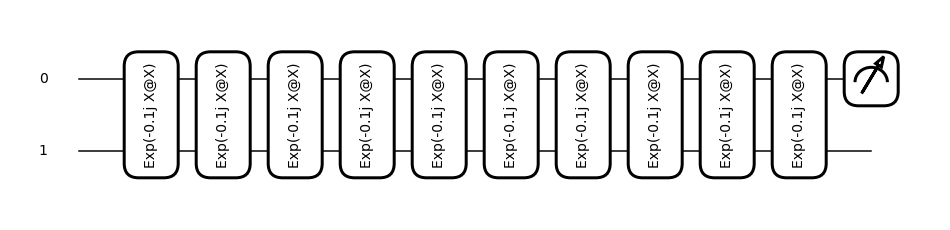

In [47]:
time = 0.1
steps = 10

fig, ax = qml.draw_mpl(Trotter)(time, steps)
plt.show()

In [48]:
Trotter(time, steps)

tensor(-0.41614684, requires_grad=True)